## Exploratory data analysis in Python

**Key Steps**

- Import Libraries
- Load the data in dataframe
- Check the column/data types
- fix the data type if needed
- Rename columns if needed to have more meaningful names
- Drop irrelevant columns
- Identify duplicates, drop if needed
- Find missing values, imputate or drop as per data
- Detect Outliers, and take care of them if needed
- Plot to provide visual diagrams 
- statistical summary

##### Using the mtcars dataset.

For the below set of questions, we will be using the cars data from [Motor Trend Car Road Tests](http://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). 

Details :
    
A data frame with 32 observations on 11 (numeric) variables.

- mpg 	Miles/(US) gallon
- cyl 	Number of cylinders
- disp 	Displacement (cu.in.)
- hp 	Gross horsepower
- drat 	Rear axle ratio
- wt 	Weight (1000 lbs)
- qsec 	1/4 mile time
- vs 	Engine (0 = V-shaped, 1 = straight)
- am 	Transmission (0 = automatic, 1 = manual)
- gear 	Number of forward gears
- carb 	Number of carburetors 

### 1. Importing the required libraries for EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 2. Loading the data into dataframe

In [4]:
# Reading a dataset from a csv file using pandas.
mtcars = pd.read_csv('data/1_mtcars.csv')      # Assuming 'mtcars.csv' is the file containing the dataset
mtcars.index = mtcars['name']   # Setting the 'name' column as the index of the DataFrame
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
mtcars.sample(6) # Displaying a random sample of 6 rows from the dataset

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,,
Chrysler Imperial,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
Pontiac Firebird,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
Maserati Bora,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
Merc 450SE,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
Ferrari Dino,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
AMC Javelin,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2


### 3. Shape of the dataset

In [6]:
mtcars.shape  # Displaying the shape of the dataset

(32, 12)

### 4. Check the types of data

In [7]:
mtcars.info()  # Displaying the information about the DataFrame including data types

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.2+ KB


In [8]:
mtcars.columns  # Displaying the columns of the DataFrame

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [9]:
mtcars.dtypes  # Displaying the data types of each column in the DataFrame

name     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [10]:
mtcars.count()  # Counting the number of non-null entries in each column

name    32
mpg     32
cyl     32
disp    32
hp      32
drat    32
wt      32
qsec    32
vs      32
am      32
gear    32
carb    32
dtype: int64

### 5. Check for missing values

In [11]:
mtcars.isnull().sum()  # Checking for missing values in the DataFrame

name    0
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [12]:
mtcars.duplicated().sum()  # Checking for duplicate rows in the DataFrame

0

### 6. Detecting outliers

<Axes: >

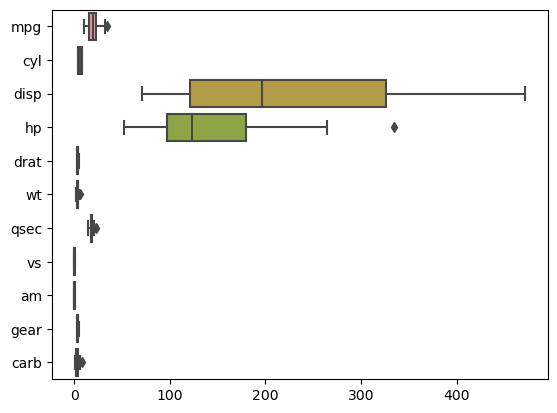

In [13]:
sns.boxplot(data=mtcars,orient='h')  # Creating a boxplot to visualize the distribution of the data and detect outliers

<Axes: >

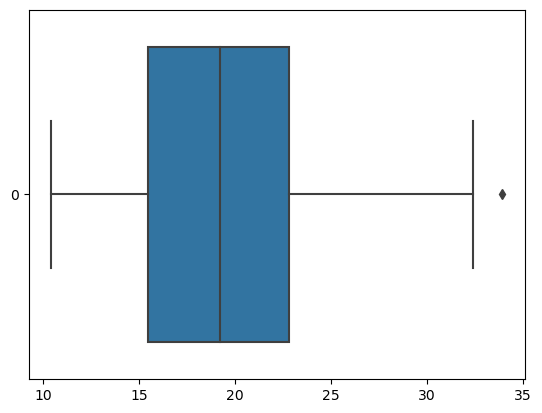

In [14]:
sns.boxplot(data=mtcars['mpg'], orient='h')  # Creating a boxplot to visualize the distribution of the data and detect outliers

<Axes: >

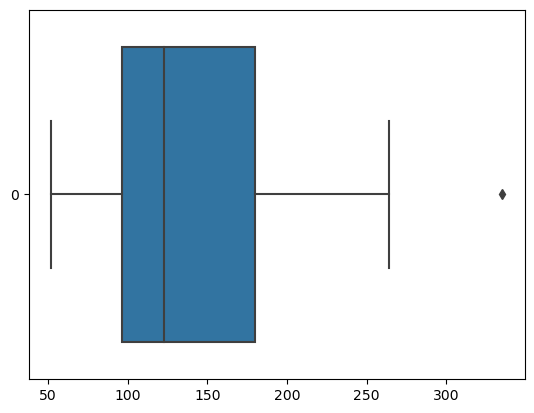

In [15]:
sns.boxplot(data=mtcars['hp'], orient='h')  # Creating a boxplot to visualize the distribution of the data and detect outliers

<Axes: >

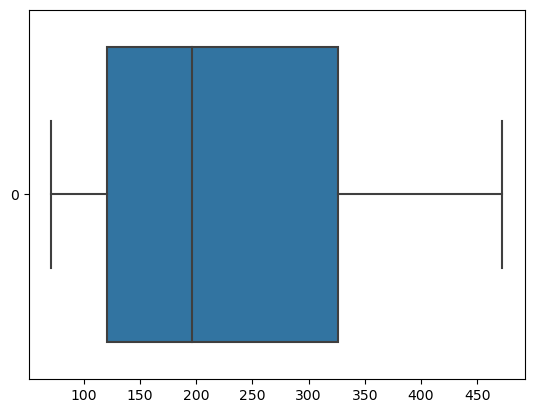

In [16]:
sns.boxplot(data=mtcars['disp'], orient='h')  # Creating a boxplot to visualize the distribution of the data and detect outliers

In [17]:
mtcars1 = mtcars.drop(columns=['name'])  # Dropping the 'name' column from the DataFrame
Q1 = mtcars1.quantile(0.25)  # Calculating the first quartile (25th percentile)
Q3 = mtcars1.quantile(0.75)  # Calculating the third quartile (75th percentile)
IQR = Q3 - Q1  # Calculating the interquartile range (IQR)
lower_bound = Q1 - 1.5 * IQR  # Calculating the lower bound for outliers
upper_bound = Q3 + 1.5 * IQR  # Calculating the upper bound for outliers
outliers = (mtcars1 < lower_bound) | (mtcars1 > upper_bound)  # Identifying outliers based on the calculated bounds
outliers.sum() # Counting the number of outliers in each column

mpg     1
cyl     0
disp    0
hp      1
drat    0
wt      3
qsec    1
vs      0
am      0
gear    0
carb    1
dtype: int64

In [18]:
mtcars['brand'] = mtcars['name'].str.split(' ', expand=True)[0]  # Splitting the 'name' column to extract the first word and counting its occurrences
mtcars['brand'].value_counts()  # Extracting the first word from the 'name' column and creating a new 'brand' column

brand
Merc        7
Mazda       2
Fiat        2
Toyota      2
Hornet      2
Duster      1
Camaro      1
Maserati    1
Ferrari     1
Ford        1
Lotus       1
Porsche     1
Pontiac     1
AMC         1
Valiant     1
Dodge       1
Datsun      1
Honda       1
Chrysler    1
Lincoln     1
Cadillac    1
Volvo       1
Name: count, dtype: int64

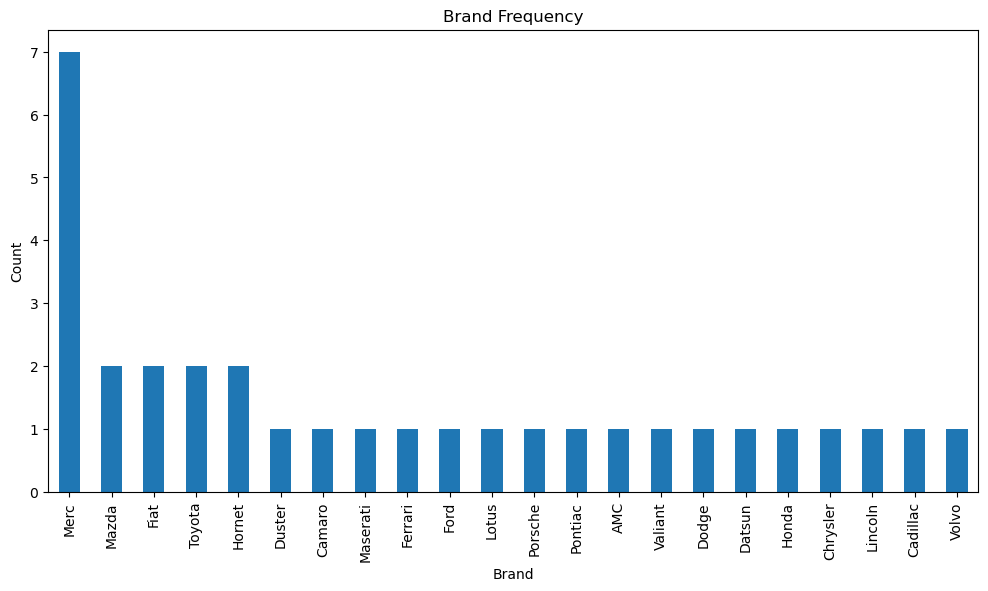

In [19]:
mtcars.brand.value_counts().plot(kind='bar', figsize=(12, 6))  # Plotting a bar chart to visualize the frequency of each brand
plt.title('Brand Frequency')  # Setting the title of the plot
plt.xlabel('Brand')  # Setting the x-axis label
plt.ylabel('Count')  # Setting the y-axis label
plt.show()  # Displaying the plot

<Axes: >

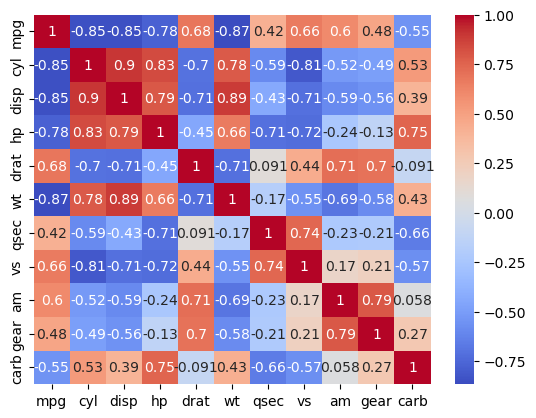

In [20]:
sns.heatmap(mtcars1.corr(), annot=True, cmap='coolwarm')  # Creating a heatmap to visualize the correlation matrix of the DataFrame

### 7. Statistical Summary

In [21]:
mtcars.describe(include='all').T  # Displaying a statistical summary of the DataFrame including count, mean, std, min, 25%, 50%, 75%, and max values

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,32,32,Mazda RX4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mpg,32.0,NaN,NaN,NaN,20.090625,6.026948,10.4,15.425,19.2,22.8,33.9
cyl,32.0,NaN,NaN,NaN,6.1875,1.785922,4.0,4.0,6.0,8.0,8.0
disp,32.0,NaN,NaN,NaN,230.721875,123.938694,71.1,120.825,196.3,326.0,472.0
hp,32.0,NaN,NaN,NaN,146.6875,68.562868,52.0,96.5,123.0,180.0,335.0
drat,32.0,NaN,NaN,NaN,3.596563,0.534679,2.76,3.08,3.695,3.92,4.93
wt,32.0,NaN,NaN,NaN,3.21725,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,NaN,NaN,NaN,17.84875,1.786943,14.5,16.8925,17.71,18.9,22.9
vs,32.0,NaN,NaN,NaN,0.4375,0.504016,0.0,0.0,0.0,1.0,1.0
am,32.0,NaN,NaN,NaN,0.40625,0.498991,0.0,0.0,0.0,1.0,1.0


In [22]:
mtcars['cyl'].value_counts(normalize=True)*100  # Displaying the count of unique values in the 'cyl' column

cyl
8    43.750
4    34.375
6    21.875
Name: proportion, dtype: float64

In [23]:
mtcars.groupby('cyl')[['disp','hp']].mean()

,disp,hp
cyl,,
4,105.136364,82.636364
6,183.314286,122.285714
8,353.100000,209.214286


In [24]:
mtcars.groupby('brand')[['mpg','hp']].mean()  # Grouping the DataFrame by 'brand' and calculating the mean of 'mpg' and 'hp'

,mpg,hp
brand,,
AMC,15.200000,150.000000
Cadillac,10.400000,205.000000
Camaro,13.300000,245.000000
Chrysler,14.700000,230.000000
Datsun,22.800000,93.000000
Dodge,15.500000,150.000000
Duster,14.300000,245.000000
Ferrari,19.700000,175.000000
Fiat,29.850000,66.000000
